## Example: K-Means

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as sp_dist
import seaborn

from scratch.algos.kmeans import KMeans

plt.rcParams["figure.figsize"] = (15, 30)
seaborn.set(font_scale=1.5)
seaborn.set_style("whitegrid")

In [2]:
X = np.loadtxt("../data/Q4Test.txt", skiprows=1)

In [3]:
N = X.shape[0]

idx = np.array(range(N))
idx_train = np.random.choice(idx, 140, replace=False)
idx_valid = np.delete(idx, idx_train, axis=0)

Xtrain = X[idx_train, :]
Xvalid = X[idx_valid, :]

print(Xtrain.shape)
print(Xvalid.shape)

(140, 2)
(10, 2)


In [4]:
n_clusts = 3

m = KMeans(n_clusts=n_clusts)
m.fit(X=Xtrain)

preds = m.predict(X=Xvalid)

print(m.centers)
print(m.labels)
print(preds)

[[ 9.78972709  5.38803347]
 [ 6.05699134  2.06544622]
 [ 6.12581542 10.07476868]]
[1 2 2 2 0 0 2 1 1 2 0 1 2 0 0 0 2 1 2 2 0 2 1 1 1 0 0 2 1 0 0 1 0 0 0 0 1
 1 0 2 0 1 1 1 1 1 2 0 2 0 2 2 2 0 0 0 0 1 0 1 1 2 1 2 2 2 2 0 1 2 1 2 0 0
 1 1 2 2 1 0 0 0 0 1 0 2 2 1 0 2 2 1 1 0 2 2 0 2 0 1 2 1 1 0 1 2 1 1 0 0 0
 2 0 0 2 1 1 1 1 2 1 1 0 0 1 2 2 2 1 1 1 1 0 0 2 1 2 0 1 2]
[2 2 2 2 2 1 1 1 0 0]


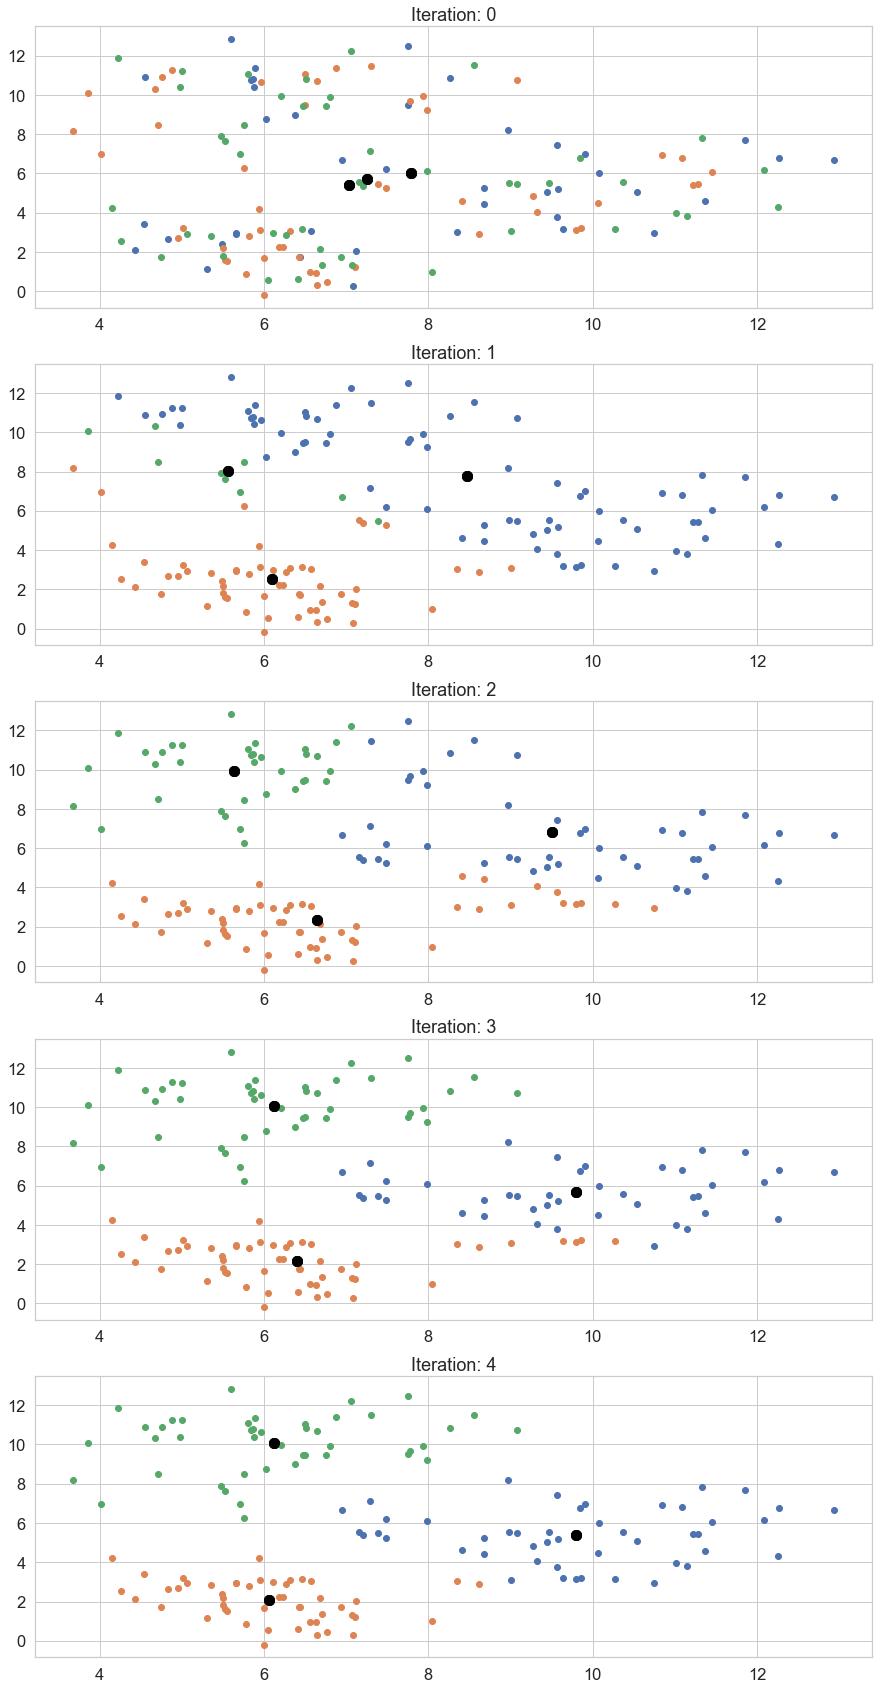

In [5]:
# cluster convergence
its = len(m.trajectory_labels)

fig, ax = plt.subplots(its, 1)

for i in range(its):
    for j in range(n_clusts):
        tmp = Xtrain[m.trajectory_labels[i] == j]
        ax[i].set_title("Iteration: " + str(i))
        ax[i].scatter(tmp[:,0], tmp[:,1])
        ax[i].scatter(m.trajectory_centers[i][:,0], m.trajectory_centers[i][:,1], c="black", s=100)

plt.show()